# Análise Exploratória Avançada

### Analisando um Dataset do Kaggle - Dados do QuintoAndar

Com os dados de imóveis na cidade de São Paulo, a ideia é verificar quais as localidades oferecerem os melhores imóveis, checar quais características influenciam nos preços.

Link para o dataset: https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices

Definição das colunas:

- Endereço: Endereço do imóvel
- Bairro: Bairro onde fica o imóvel
- Área: Área do imóvel em metros quadrados
- Quartos: Número de quartos do imóvel
- Garagem: Número de vagas de estacionamento disponíveis no imóvel
- Aluguel: O aluguel mensal do imóvel
- Tipo: Tipo do imóvel (apartamento, casa, etc.)
- Total: Custo total do imóvel, incluindo aluguel, impostos e taxas

In [4]:
## importando as bibliotecas

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings

warnings.filterwarnings("ignore")

## configurar o estulo do gráfico do ggplot

plt.style.use("ggplot")

## configurar para exibir até 15 linhas de um dataframe

pd.set_option("display.max_rows", 15)

## configurar para exibir todas as colunas de um dataframe

pd.set_option("display.max_columns", None)

## configurar quebras e espaçamentos automásticos com nb_black

%load_ext nb_black

## carregando o dataset

df = pd.read_csv("data.csv")

## visualizando

df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


<IPython.core.display.Javascript object>

In [5]:
## checando formato do df

print(f"O dataframe possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataframe possui 11657 linhas e 8 colunas.


<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


<IPython.core.display.Javascript object>

In [10]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

numericas = df.select_dtypes(include=numerics)

n_numericas = df.select_dtypes(exclude=numerics)


print(
    f"Temos {numericas.shape[1]} colunas numéricas e {n_numericas.shape[1]} colunas não numéricas"
)

Temos 5 colunas numéricas e 3 colunas não numéricas


<IPython.core.display.Javascript object>

## Entendendo os Dados

### Iniciando com Análise Univariada dos Preços

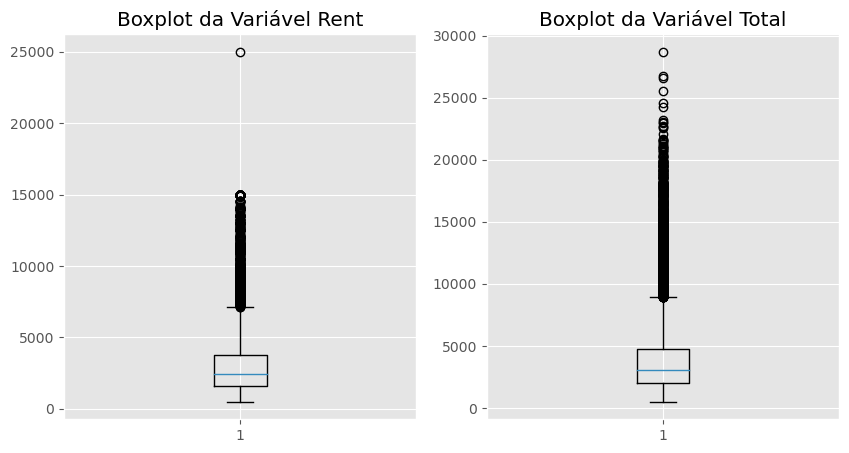

<IPython.core.display.Javascript object>

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # cria uma figura com 2 subplots

## cria um boxplot com a variável rent no primeiro subplot
axs[0].boxplot(df["rent"])
axs[0].set_title("Boxplot da Variável Rent")

## cria um boxplot para a variável total no segundo subplot
axs[1].boxplot(df["total"])
axs[1].set_title("Boxplot da Variável Total")

## mostrar o gráfico
plt.show()

### Detalhando o Gráfico

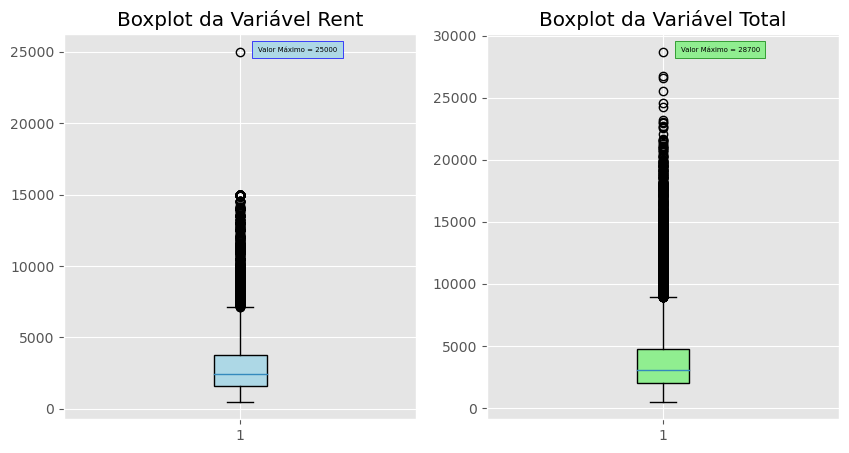

<IPython.core.display.Javascript object>

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # cria uma figura com 2 subplots

## cria um boxplot com a variável rent no primeiro subplot
bp1 = axs[0].boxplot(df["rent"], patch_artist=True)
axs[0].set_title("Boxplot da Variável Rent")

## cor do boxplot
bp1["boxes"][0].set_facecolor("lightblue")

## adicionando legenda do valor máximo
max_rent = np.max(df["rent"])
axs[0].annotate(
    f"Valor Máximo = {max_rent}",
    xy=(1, max_rent),
    xytext=(1.05, max_rent),
    bbox=dict(facecolor="lightblue", edgecolor="blue"),
    fontsize=5,
)  # modifica a fonte para um tamanho menor

## cria um boxplot para a variável total no segundo subplot
bp2 = axs[1].boxplot(df["total"], patch_artist=True)
axs[1].set_title("Boxplot da Variável Total")

## cor do boxplot
bp2["boxes"][0].set_facecolor("lightgreen")

## adicionando legenda do valor máximo
max_total = np.max(df["total"])
axs[1].annotate(
    f"Valor Máximo = {max_total}",
    xy=(1, max_total),
    xytext=(1.05, max_total),
    bbox=dict(facecolor="lightgreen", edgecolor="green"),
    fontsize=5,
)  # modifica a fonte para um tamanho menor

## mostrar o gráfico
plt.show()

Verificamos a presença de outliers, embora a mediana esteja abaixo de 5000, o valor máximo de ambos os gráficos chega próximo dos 30000.

### Checando a Distribuição de Mediana por meio de um Histograma

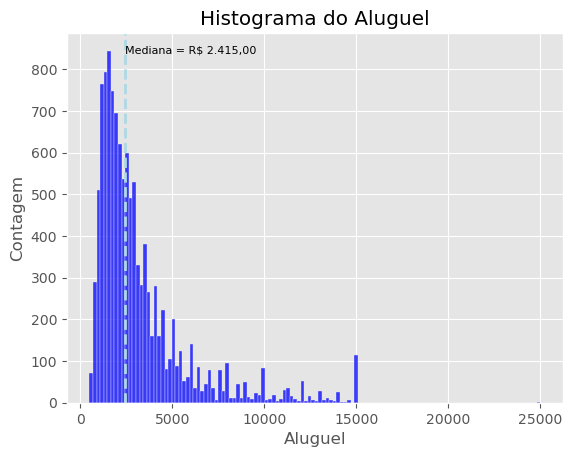

<IPython.core.display.Javascript object>

In [16]:
## calculando a mediana de rent

mediana_rent = df.rent.median()

## formatando a mediana para o formato 'R$ x,xx'

mediana_rent_format = (
    "R$ {:,.2f}".format(mediana_rent)
    .replace(",", "v")
    .replace(".", ",")
    .replace("v", ".")
)

_ = sns.histplot(df.rent, color="blue")
_ = plt.axvline(mediana_rent, color="lightblue", linestyle="dashed", linewidth=2)
_ = plt.title("Histograma do Aluguel")
_ = plt.xlabel("Aluguel")
_ = plt.ylabel("Contagem")
_ = plt.text(
    x=df.rent.median(), y=840, s=f"Mediana = {mediana_rent_format}", fontsize=8
)
_ = plt.show()